In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Type of Distributions
Note : Before we dive deep into this topic, i hope you already know well about theory of probability. if you have not, you may consider to learn about probability first since this topic will required probability. 
- Table of contents :
1. Differences between likelihood and probability.
2. Binomial Distribution.
3. Poisson Distribution.
4. Exponential Distribution.
5. Normal Distribution.
6. Weibull Distribution.

## 1. Likelihood vs Probability
we usually think that likelihood is a same thing as probability, but in statistics there is a subtle difference between likelihood and probability. for example, given you have a data and you want to calculate the probability of specific observations in your data, so the first thing to do is to visualize your data distribution commonly with histograms. after we visualize it, we want to know which type of distribution of our data refers to, it can be (normal, poisson, uniform, binomial, exponential, or  etc). after we know what the distribution is, we have to find the parameters of the distribution in order to calculate the probability. finding the best parameters of the distribution given the observations in our data refers to likelihood. After we successfully finding the best parameters, now we can calculate the probablity which is the area under the pdf or pms function. the following is the mathematical equation for likelihood and probability :

- Likelihood Function :

$$ \large{Likelihood(paramaters|observation)}$$

- Probability Function :

$$ \large{Probability(observation|parameters)}$$

For a better explanation you can visit this link :
- https://stats.stackexchange.com/questions/2641/what-is-the-difference-between-likelihood-and-probability
- https://www.statology.org/likelihood-vs-probability/
- https://www.youtube.com/watch?v=pYxNSUDSFH4&ab_channel=StatQuestwithJoshStarmer

## 2. Binomial Distribution.
Binomial Distribution is a discrete distribution that describes distribution of number of succesful event occurs given p (succes probability) and number of trial. For example, a fair coin toss with n trial and we would like to calculate the probability number of head occurs given p = 0.5 and n = 50. The following is the pmf,cdf, expectation, and variance of binomial distribution.

- PMF (Probability Mass Function).
$$ f(x|(n,p)) = \dbinom{n}{x} (p)^{x} (1 - p)^{n-x}$$
- CDF (Cummulativ Probability Function).
$$ F(x|(n,p)) = \sum_{x = 0}^{n}\dbinom{n}{x} (p)^{x} (1 - p)^{n-x}$$
- Expectation.
$$ E[Binomial] = np $$
- Standard Deviation.
$$ Var[Binomial] = \sqrt{np(1-p)}$$

Expectation = 25.0
Variance = 12.5
Standard Deviation = 3.5355339059327378
Visualization :


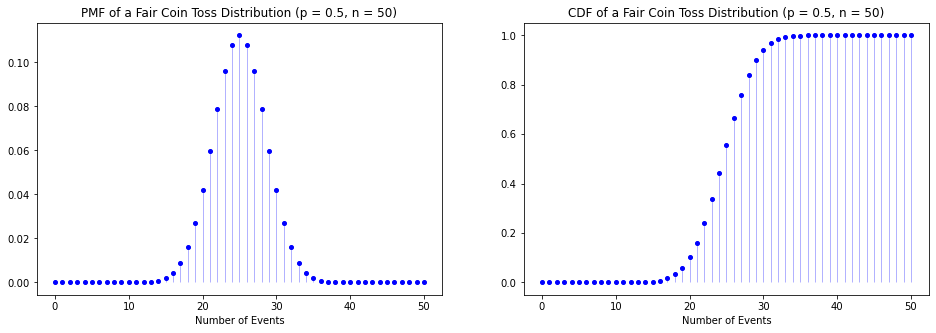

In [30]:
n = 50 
p = 0.5
mean, var = stats.binom.stats(n, p)
print(f'Expectation = {mean}')
print(f'Variance = {var}')
print(f'Standard Deviation = {np.sqrt(var)}')
print('Visualization :')
fig, ax = plt.subplots(1,2,figsize = (16,5))
x = np.arange(0,51)
ax[0].plot(x, stats.binom.pmf(x, n, p), 'bo', ms=4, label='binom pmf')
ax[0].vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=1, alpha=0.3)
ax[0].set_title('PMF of a Fair Coin Toss Distribution (p = 0.5, n = 50)')
ax[0].set_xlabel('Number of Events')

ax[1].plot(x, stats.binom.cdf(x, n, p), 'bo', ms=4, label='binom cdff')
ax[1].vlines(x, 0, stats.binom.cdf(x, n, p), colors='b', lw=1, alpha=0.3)
ax[1].set_title('CDF of a Fair Coin Toss Distribution (p = 0.5, n = 50)')
ax[1].set_xlabel('Number of Events')
plt.show()

## 3. Poisson Distribution